### Environment Impact of Food Production Analysis

### Business Understanding
##### Background and Motivation
Food production is a critical sector that sustains human life, but it also significantly impacts the environment. The agricultural sector is responsible for greenhouse gas (GHG) emissions, deforestation, water depletion, and biodiversity loss. With rising global populations and increasing food demand, there is a pressing need to understand and mitigate the environmental impact of food production. This project aims to analyze key environmental metrics, including carbon emissions, water usage, land use, and biodiversity loss, to provide insights that can help in decision-making for sustainable food systems.

##### Business Objectives
The primary objectives of this project are: Assess Environmental Impact: Quantify and analyze the effects of food production on the environment using key sustainability metrics.Identify High-Impact Food Products: Determine which food products have the highest and lowest environmental footprints. Understand Geographical Variations: Examine how food production's environmental impact varies across different regions. Propose Sustainable Alternatives: Provide actionable insights on how consumers, producers, and policymakers can reduce environmental damage. Support Decision-Making: Offer data-driven recommendations for promoting sustainable agriculture, efficient resource use, and reduced environmental degradation.

##### Analytical Questions
To guide the analysis, the following key questions will be explored:
1. Which food products contribute the most to carbon emissions?
2. How does water usage vary across different food types and production methods?
3. What is the correlation between land use and biodiversity loss in food production?
4. Which geographic regions exhibit the highest environmental impact per unit of food produced?
5. How do organic and conventional farming methods compare in terms of environmental sustainability?
6. What are the trends in food production’s environmental impact over time?
7. What sustainable alternatives can be recommended to consumers and policymakers to minimize environmental harm?

##### Key Performance Indicators (KPIs)
To measure success, the project will use the following KPIs:
- Total and per-unit carbon emissions per food type
- Water footprint per kilogram of food produced
- Land usage per food product and its impact on biodiversity
- Regional variations in food production sustainability
- Comparative analysis of different farming practices
- Identification of low-impact food alternatives
- Impact assessment of proposed sustainability recommendations

##### Constraints and Assumptions
- Data Availability: The analysis is dependent on the completeness and accuracy of the dataset.
Data Granularity: Some food categories might be aggregated, limiting specific food-level insights.

Geographical Limitations: The dataset may not cover all regions equally, which could impact comparative analysis.


6. Stakeholders and Target Audience
- Policymakers: Can use insights to develop regulations promoting sustainable food production.
- Food Producers and Farmers: Can adopt more sustainable farming practices based on the analysis.
- Environmental Organizations: Can leverage findings for advocacy and awareness campaigns.
- Consumers: Can make informed choices about environmentally friendly food consumption.


#### Datasets Used
All information about the data used for this project can be found in the 'About Dataset-environmental impacts of food' file in the data directory.

#### Data Dictionary: Environmental Impact of Food Production

| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| **Food product** | String | Name of the food product being analyzed. |
| **Land use change** | Float | Carbon emissions (kgCO₂eq) resulting from land-use change per unit of food production. |
| **Animal Feed** | Float | Carbon emissions (kgCO₂eq) from producing animal feed per unit of food production. |
| **Farm** | Float | Carbon emissions (kgCO₂eq) generated directly from farming activities. |
| **Processing** | Float | Carbon emissions (kgCO₂eq) from food processing and manufacturing. |
| **Transport** | Float | Carbon emissions (kgCO₂eq) from transporting food products. |
| **Packaging** | Float | Carbon emissions (kgCO₂eq) from packaging materials and processes. |
| **Retail** | Float | Carbon emissions (kgCO₂eq) from food retail operations. |
| **Total_emissions** | Float | Total greenhouse gas emissions (kgCO₂eq) for each food product. |
| **Eutrophying emissions per 1000kcal** | Float | Eutrophication potential (gPO₄eq) per 1000 kilocalories of food. |
| **Eutrophying emissions per kilogram** | Float | Eutrophication potential (gPO₄eq) per kilogram of food. |
| **Eutrophying emissions per 100g protein** | Float | Eutrophication potential (gPO₄eq) per 100 grams of protein in the food product. |
| **Freshwater withdrawals per 1000kcal** | Float | Freshwater use (liters) per 1000 kilocalories of food. |
| **Freshwater withdrawals per 100g protein** | Float | Freshwater use (liters) per 100 grams of protein. |
| **Freshwater withdrawals per kilogram** | Float | Freshwater use (liters) per kilogram of food. |
| **Greenhouse gas emissions per 1000kcal** | Float | Greenhouse gas emissions (kgCO₂eq) per 1000 kilocalories of food. |
| **Greenhouse gas emissions per 100g protein** | Float | Greenhouse gas emissions (kgCO₂eq) per 100 grams of protein. |
| **Land use per 1000kcal** | Float | Land use (m²) per 1000 kilocalories of food. |
| **Land use per kilogram** | Float | Land use (m²) per kilogram of food. |
| **Land use per 100g protein** | Float | Land use (m²) per 100 grams of protein. |
| **Scarcity-weighted water use per kilogram** | Float | Scarcity-weighted water use (liters) per kilogram of food. |
| **Scarcity-weighted water use per 100g protein** | Float | Scarcity-weighted water use (liters) per 100 grams of protein. |
| **Scarcity-weighted water use per 1000kcal** | Float | Scarcity-weighted water use (liters) per 1000 kilocalories of food. |

##### Import All Necessary Libraries

In [48]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data Preprocessing Libraries
from sklearn.preprocessing import StandardScaler

# statistics library
import scipy

# Utility Library
import warnings
warnings.filterwarnings(action="ignore")

#### Data Understanding

In [3]:
# Load dataset
df = pd.read_csv("../data/Food_Production.csv")
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [4]:
# view last 5 rows
df.tail(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,...,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,...,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,...,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,...,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Data Analysis

In [5]:
# view columns
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [6]:
# check shape of data
df.shape

(43, 23)

In [7]:
# check info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [8]:
# Perform descriptive statistics on datasets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Land use change,43.0,1.260465,3.357730,-2.100000,0.000000,0.200000,0.800000,16.300000
Animal Feed,43.0,0.453488,0.919200,0.000000,0.000000,0.000000,0.000000,2.900000
Farm,43.0,3.469767,7.083264,0.100000,0.350000,0.800000,2.200000,39.400000
Processing,43.0,0.253488,0.372475,0.000000,0.000000,0.100000,0.300000,1.300000
Transport,43.0,0.195349,0.158795,0.000000,0.100000,0.100000,0.200000,0.800000
Packging,43.0,0.269767,0.342633,0.000000,0.100000,0.100000,0.300000,1.600000
Retail,43.0,0.069767,0.110270,0.000000,0.000000,0.000000,0.150000,0.300000
Total_emissions,43.0,5.972093,10.501753,0.200000,0.850000,1.600000,6.000000,59.600000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),33.0,27.181547,46.445959,0.708419,4.214932,7.000000,26.324324,197.357143
Eutrophying emissions per kilogram (gPO₄eq per kilogram),38.0,46.141316,82.808808,0.690000,3.752500,11.460000,45.840000,365.290000


In [9]:
# calculate percentage of null values
(df.isnull().sum()/df.shape[0])*100

Food product                                                                0.000000
Land use change                                                             0.000000
Animal Feed                                                                 0.000000
Farm                                                                        0.000000
Processing                                                                  0.000000
Transport                                                                   0.000000
Packging                                                                    0.000000
Retail                                                                      0.000000
Total_emissions                                                             0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   23.255814
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.627907
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams prot

#### Observation
Can be observed that out of the 23 columns, there are 9 columns with No-Null Values and 14 columns with Null Values

#### Next Steps
I will further explore the data to see ways to fill these null values

In [10]:
# explore further columns with Null Values
df[df.columns[df.isna().any()]]

,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,4.754098,3.48,20.470588,80.737705,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,5.008798,17.08,7.977581,NaN,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


It can be seen from my observation, that out of the 43 rows, 42 rows contains at least one Null Value in a column.
This will be looked further and filled.

In [11]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

#### Univariate Analysis

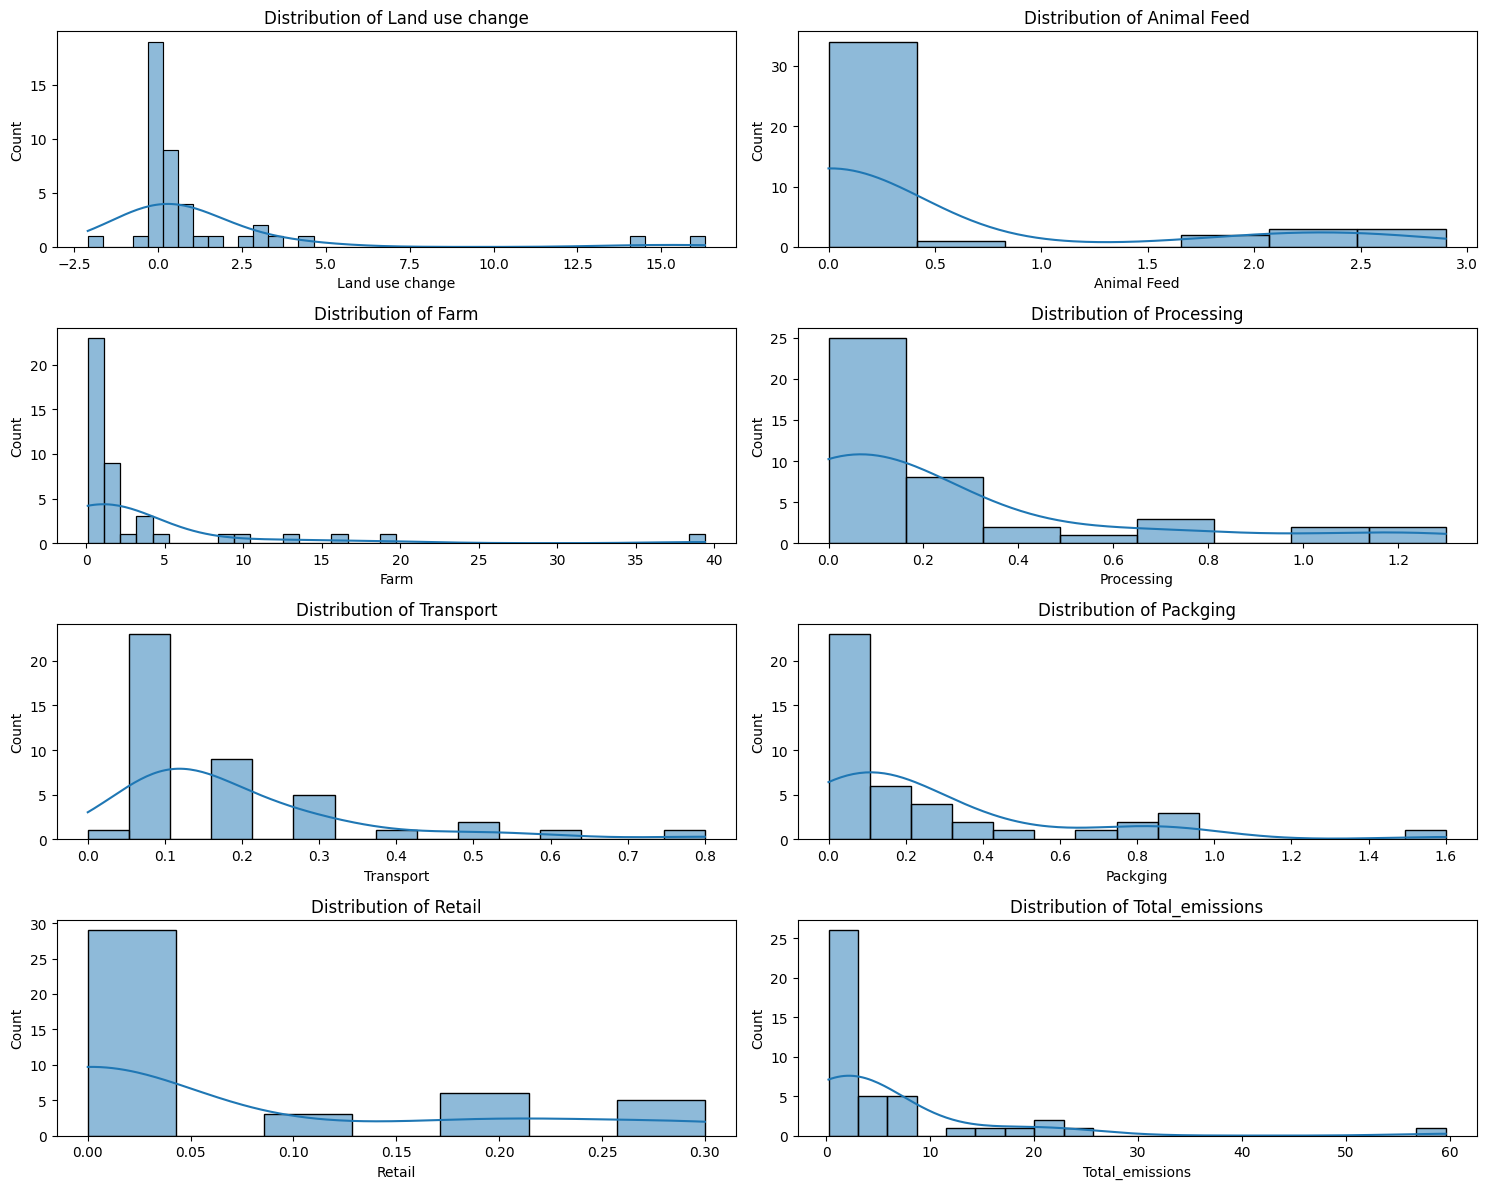

In [12]:
# Check distribution of columns
non_null_columns = ['Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions']

n_cols = 2
n_rows = -(-len(non_null_columns)//n_cols) #ceiling division

fig, axes = plt.subplots(nrows = n_rows, ncols= n_cols, figsize=(15,12))
# Flatten axes
axes = axes.flatten()

for i, col in enumerate(non_null_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

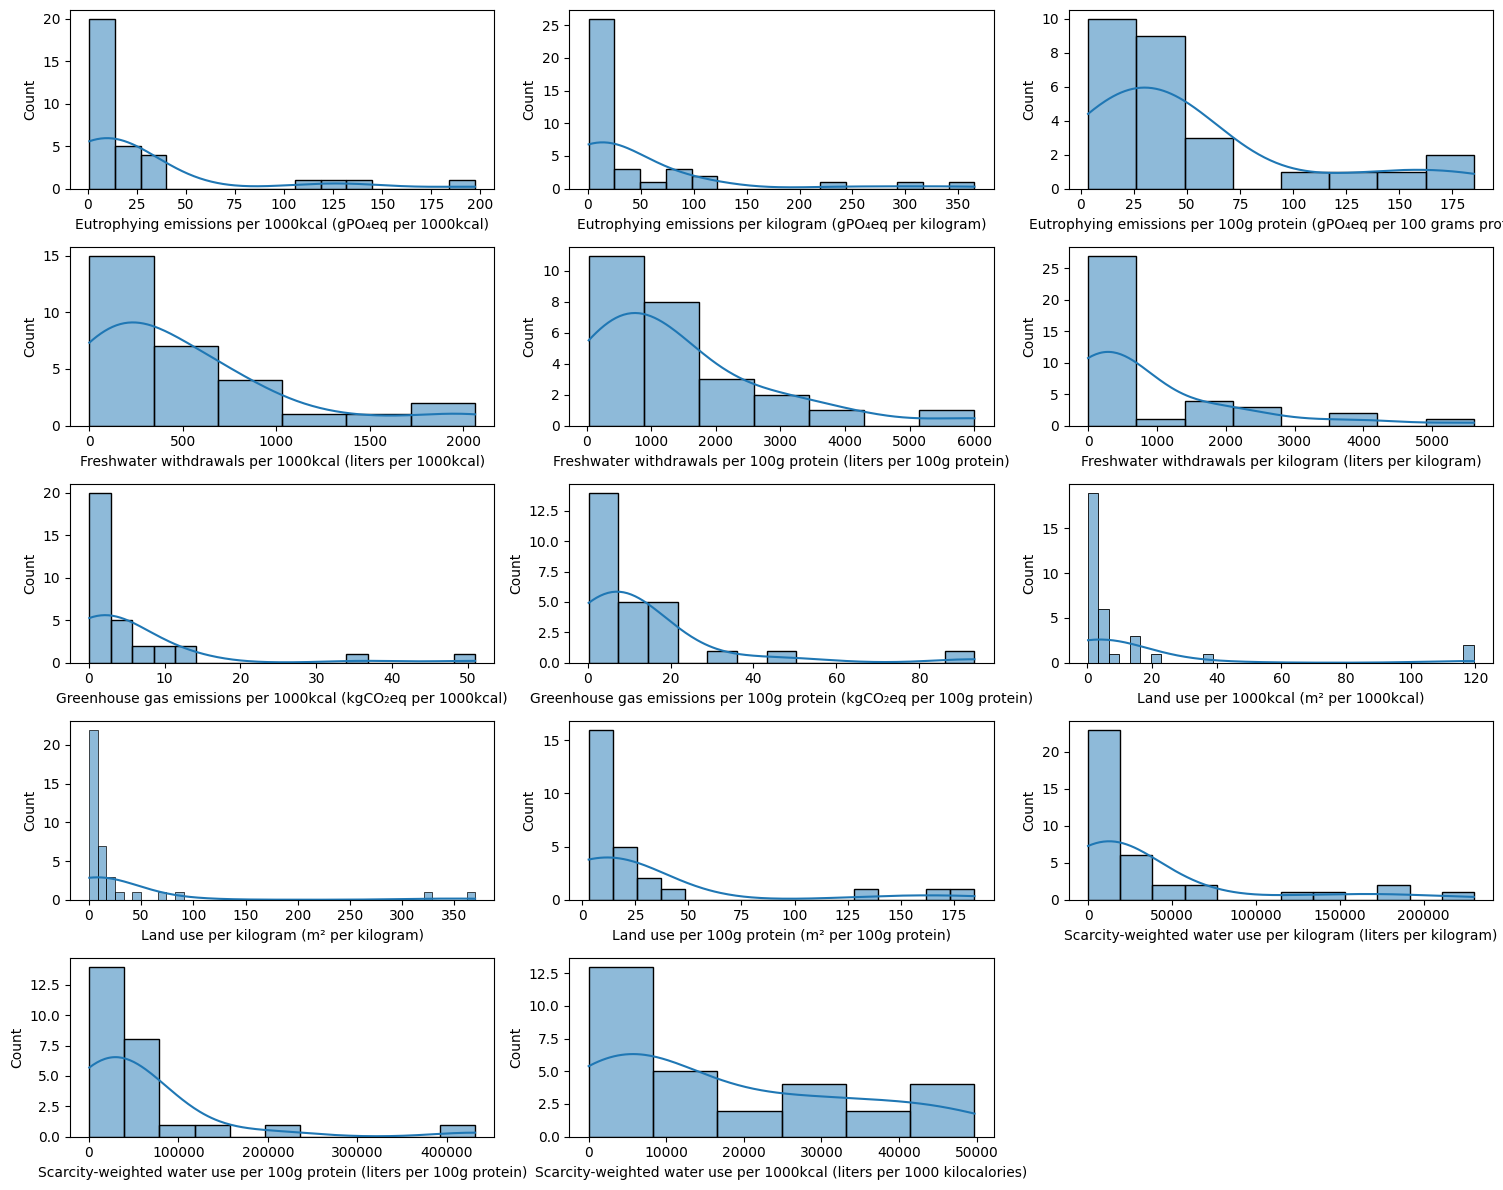

In [13]:
# Check for distribution of the other columns
columns_with_null = ['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
       'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

n_cols = 3
n_rows = -(-len(columns_with_null)// n_cols)

# create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (15,12))
# Flatten the axes
axes = axes.flatten()

# loop through the list of columns
for i, col in enumerate(columns_with_null):
    sns.histplot(df[col], kde = True, ax=axes[i])
# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

It can be observed that none of the features follows a normal distribution. This will inform me on how to deal the null values in the individal columns

#### Box Plots To Check for Outliers

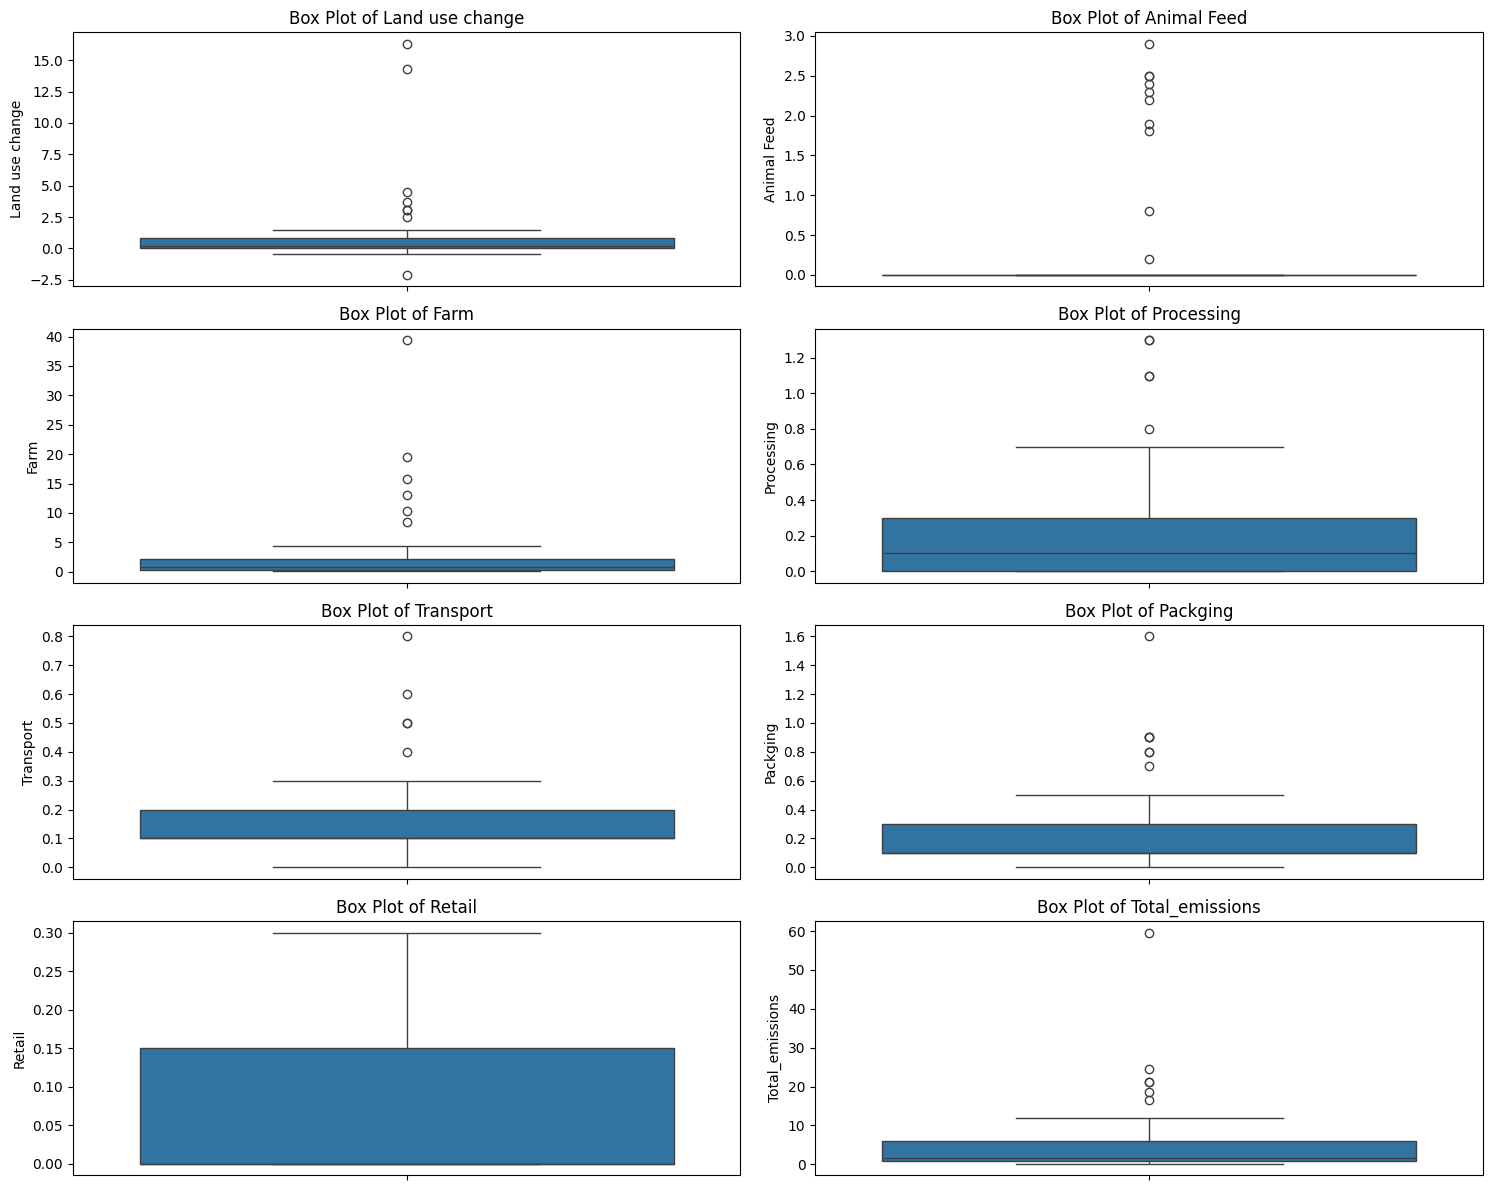

In [14]:
# Box Plots on Non-Null Columns

n_cols = 2
n_rows = -(-len(non_null_columns)//n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,12))
axes = axes.flatten()

# plot box plots using seaborn
for i, col in enumerate(non_null_columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

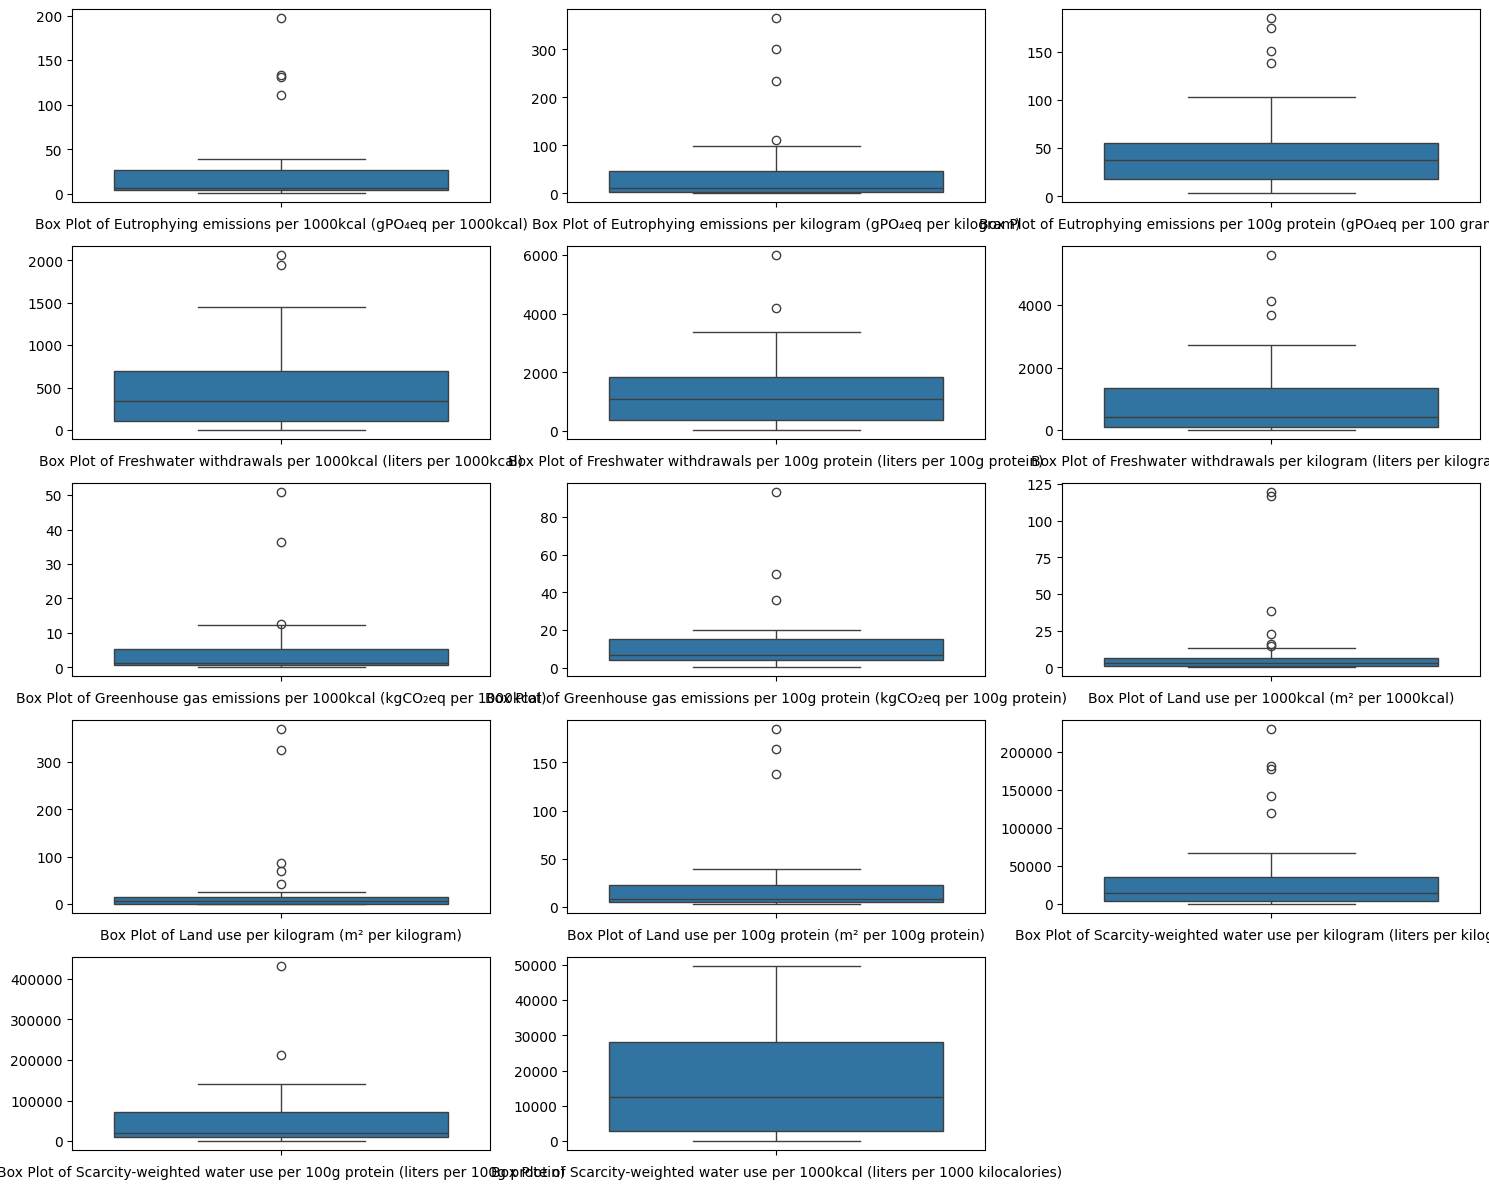

In [15]:
# Box Plots on Non-Null Columns

n_cols = 3
n_rows = -(-len(columns_with_null)//n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,12))
axes = axes.flatten()

# plot box plots using seaborn
for i, col in enumerate(columns_with_null):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_xlabel(f"Box Plot of {col}")
    axes[i].set_ylabel("")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Insight
    - It can be observed that there are outliers in all the columns with the exception of scarcity-weighted water use per 1000kcal

In [16]:
def custom_UVA_analysis(data, columns):
    """
    Generates descriptive stats, KDE, and box plot for individual columns.
    
    Parameters:
    data (DataFrame): The input dataframe.
    columns (list): The columns to be analyzed.
    """
    # Select only numeric columns
    numeric_cols = [col for col in columns if data[col].dtype in ['int64', 'float64']]
    
    if not numeric_cols:
        print("No numeric columns to analyze.")
        return

    n_cols = 2  # Number of columns in the plot grid
    n_rows = -(-len(numeric_cols) // n_cols)  # Calculate required rows (ceil division)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12), dpi=100)
    axes = np.array(axes).reshape(n_rows, n_cols)  # Ensure proper reshaping

    for i, col in enumerate(numeric_cols):
        row, col_index = divmod(i, n_cols)  # Get row and column index
        ax = axes[row, col_index]  

        # Calculate descriptive statistics
        min_val = data[col].min()
        max_val = data[col].max()
        mean_val = data[col].mean()
        median_val = data[col].median()
        range_val = max_val - min_val
        std_dev = data[col].std()
        skewness = data[col].skew()
        kurtosis = data[col].kurtosis()

        # Standard deviation points
        points = [mean_val - std_dev, mean_val + std_dev]

        # KDE plot
        sns.kdeplot(data[col], fill=True, ax=ax, color='skyblue')
        sns.lineplot(x=points, y=[0, 0], color='black', label="Std Dev", ax=ax)
        sns.scatterplot(x=[min_val, max_val], y=[0, 0], color='orange', label='Min/Max', ax=ax)
        sns.scatterplot(x=[mean_val], y=[0], color='red', label='Mean', ax=ax)
        sns.scatterplot(x=[median_val], y=[0], color='blue', label='Median', ax=ax)

        ax.set_xlabel(f'{col}', fontsize=12)
        ax.set_ylabel('Density', fontsize=10)
        ax.set_title(f"Std: {round(std_dev,2)}, Kurtosis: {round(kurtosis,2)}\n"
                     f"Skew: {round(skewness,2)}, Range: ({round(range_val,2)})\n"
                     f"Mean: {round(mean_val,2)}, Median: {round(median_val,2)}", fontsize=10)

    # Remove empty subplots if any
    for j in range(i + 1, n_rows * n_cols):
        row, col_index = divmod(j, n_cols)
        fig.delaxes(axes[row, col_index])  

    plt.tight_layout()
    plt.show()


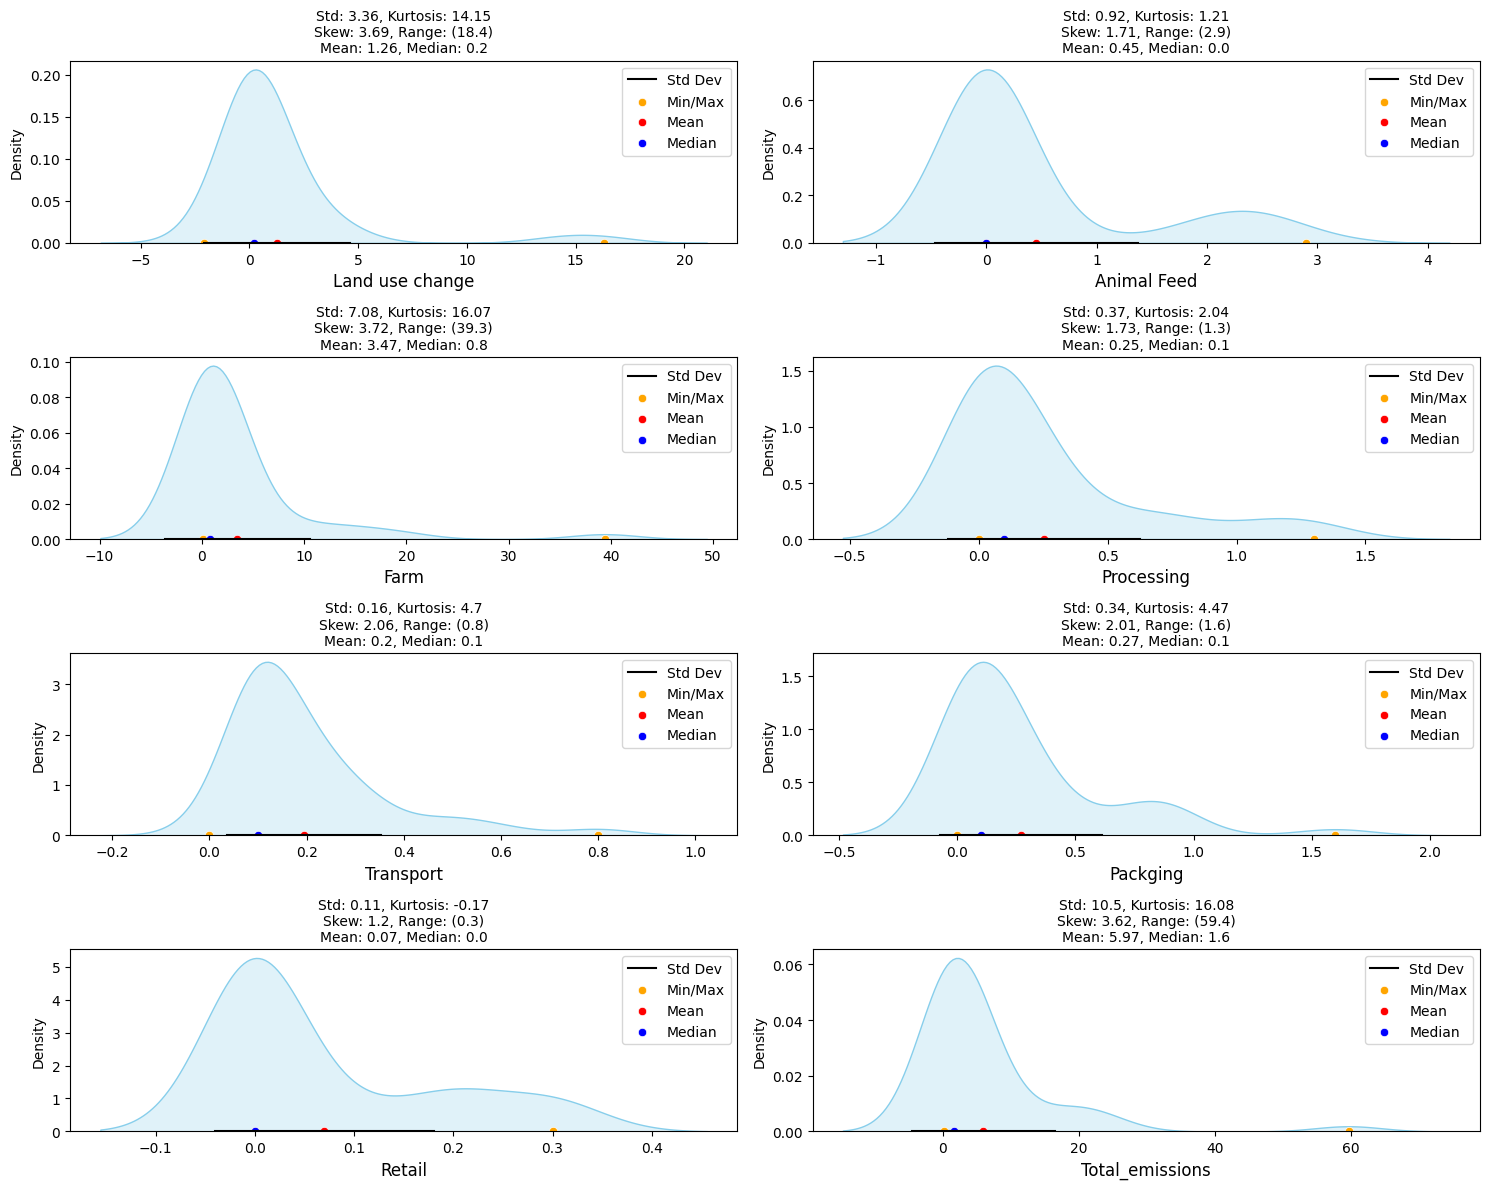

In [17]:
# Apply function to non_null_columns
custom_UVA_analysis(df, non_null_columns)

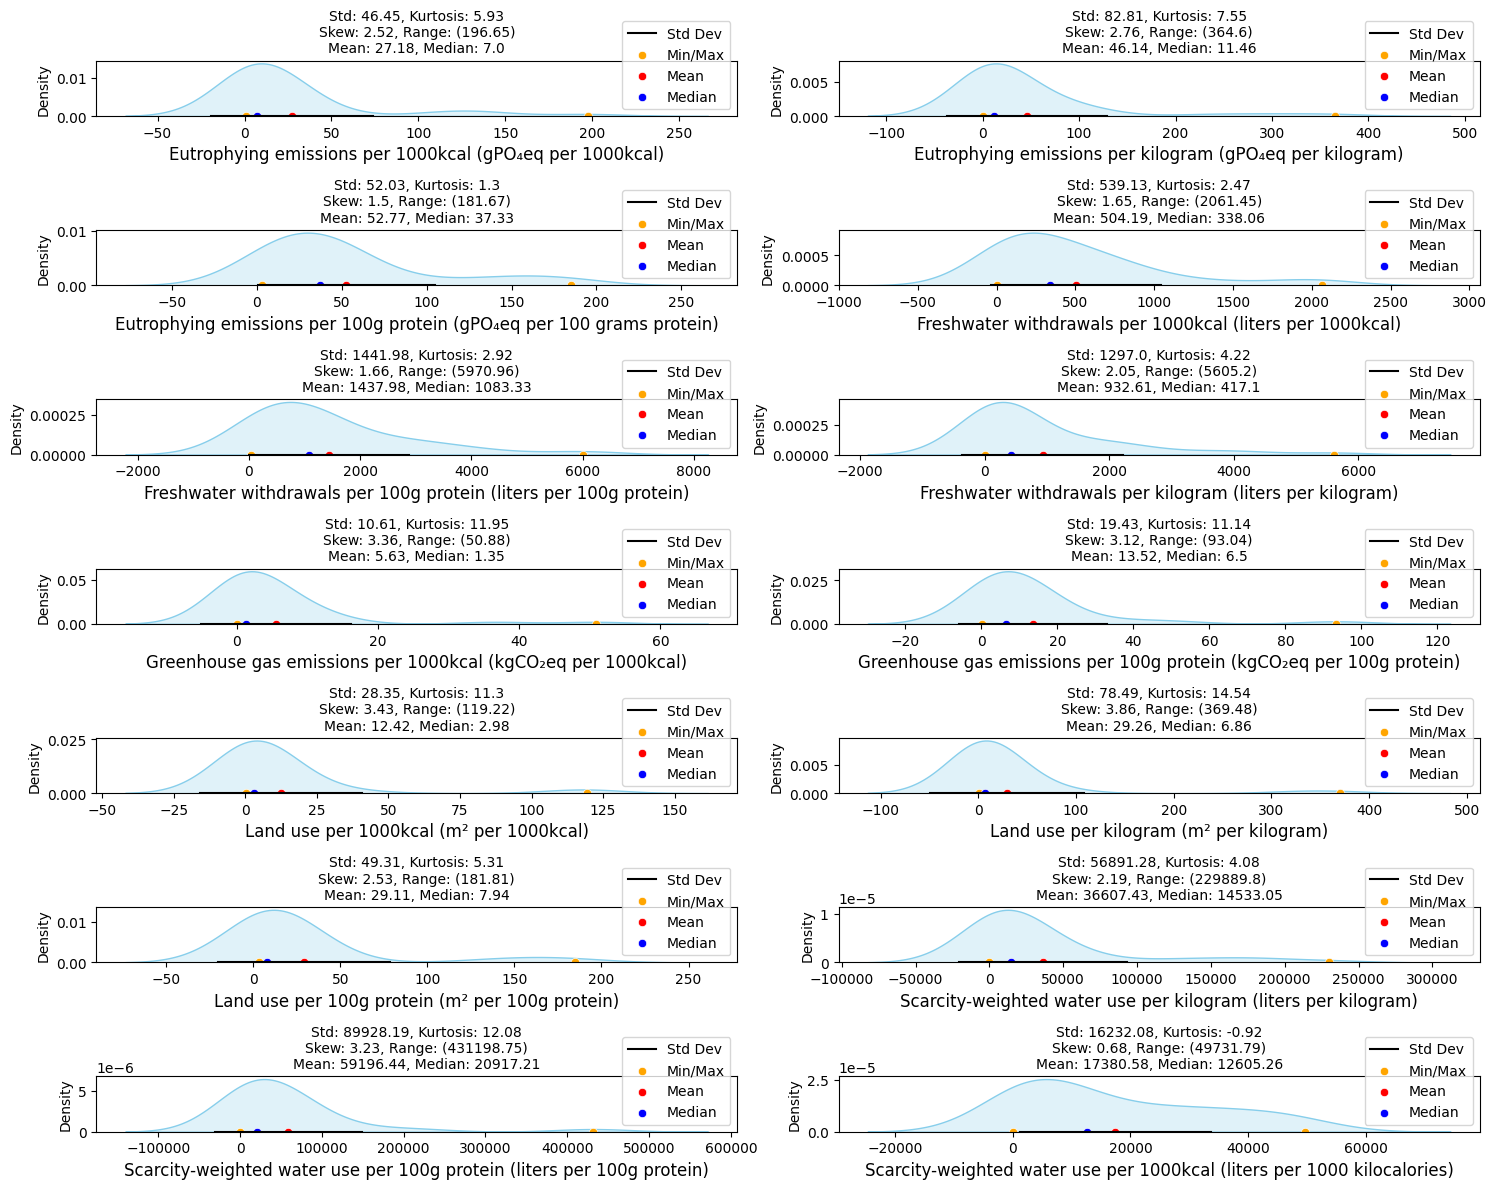

In [18]:
# Apply Custom UVA function on columns with Null Values
custom_UVA_analysis(df, columns_with_null)

#### Summary of Univariate Analysis
1. There are Null Values in 14 columns out of the 9.
2. The are a lot of outliers in the dataset
3. None of the columns follow a normal distribution.

#### Data Cleaning
- Fill the Null Values with the mean or median of the respective columns.

#### Feature Engineering
- Create a new feature called food categories to categorize similar food produce.

#### Bivariate Analysis

##### Total Emissions Vs Product

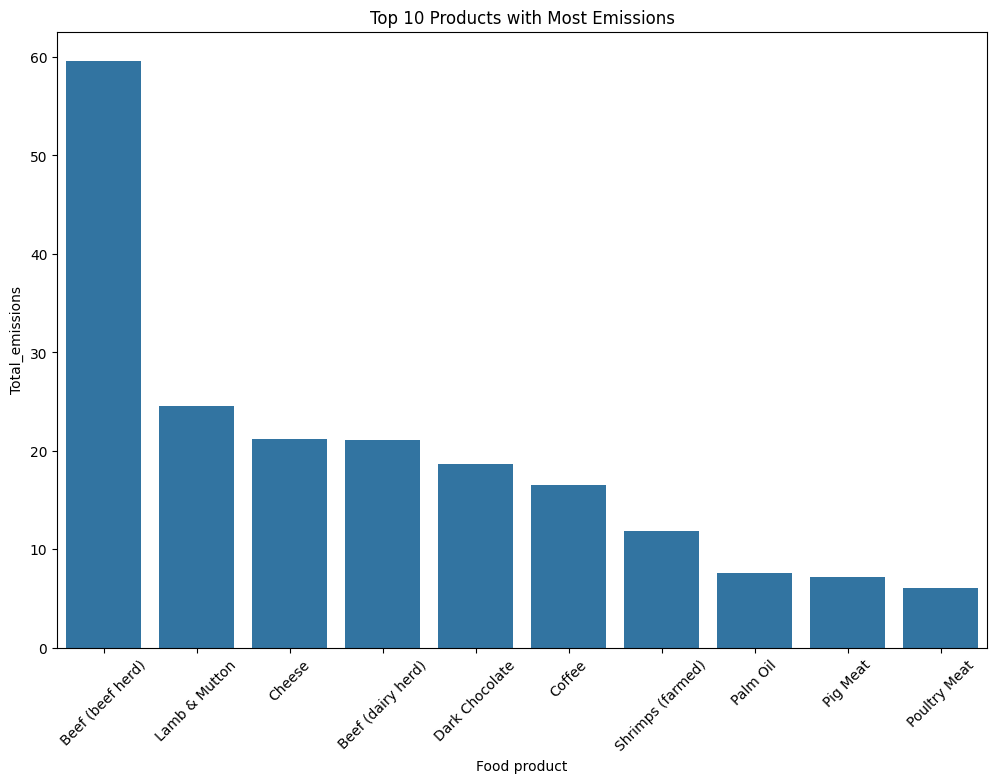

In [19]:
# Get top 10 products with the most emissions
top_10_products_by_emission = df.groupby("Food product")["Total_emissions"].sum().sort_values(ascending=False).head(10)



plt.figure(figsize=(12,8))
sns.barplot(x = top_10_products_by_emission.index, y=top_10_products_by_emission)
plt.title("Top 10 Products with Most Emissions")
plt.xticks(rotation=45)
plt.show()

- Insights:
    Animal Production seems to produce the major carbon emissions from the visualisation

##### Corelation Between Land Use change, Land use per 1000Kcal, Land use per Kilogram and Land use per 100g protein

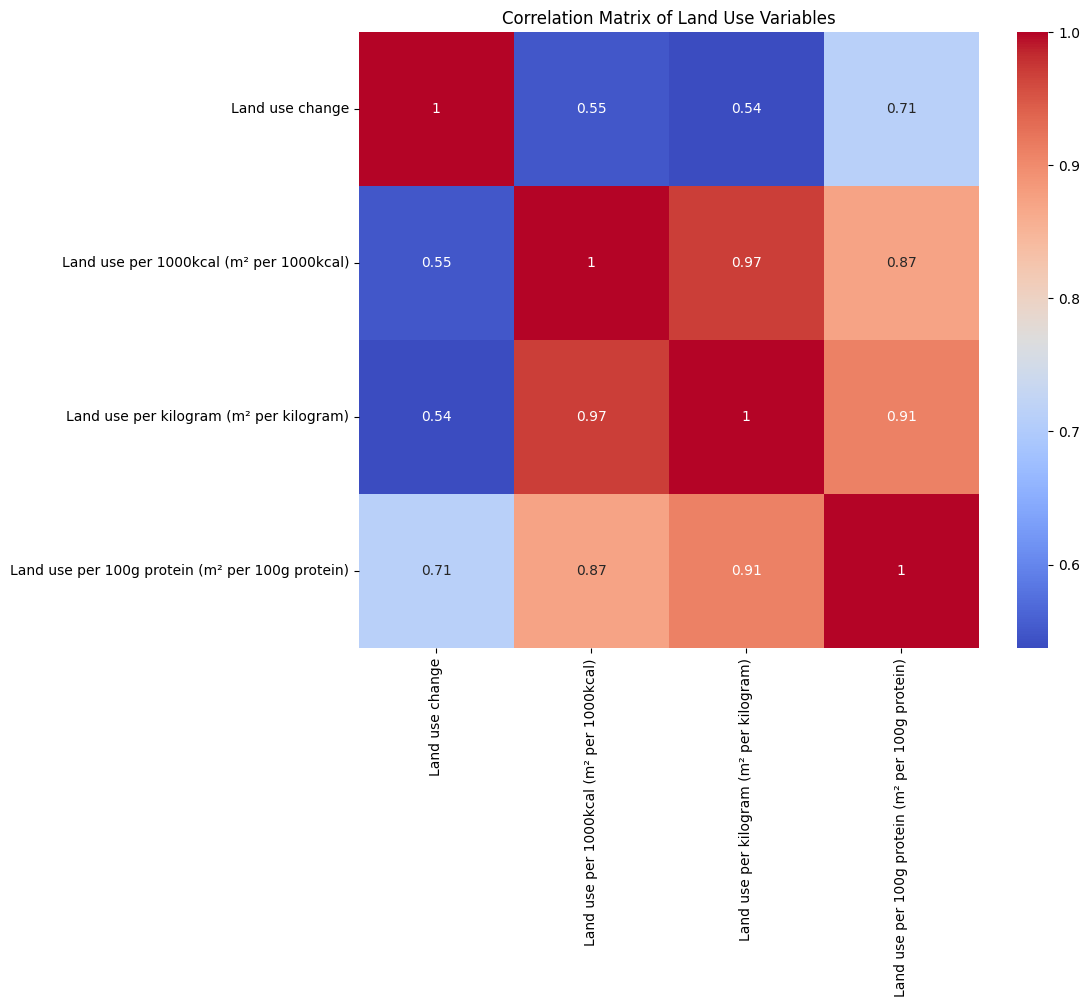

In [20]:
land_use_cols = ['Land use change','Land use per 1000kcal (m² per 1000kcal)',
                 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']

# Calculate correlation matrix
correlation_matrix = df[land_use_cols].corr()
# Heatmap to visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Land Use Variables")
plt.show()



- Insights:
    - Land use per 1000kcal, Land use per kilogram, and Land use per 100g protein are highly correlated with each other (r=0.97, 0.87, 0.91 respectively). This suggests that the amount of land used for each of these food productions is similar.

#### Correlation Between Eutrophying Emmissions

In [21]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

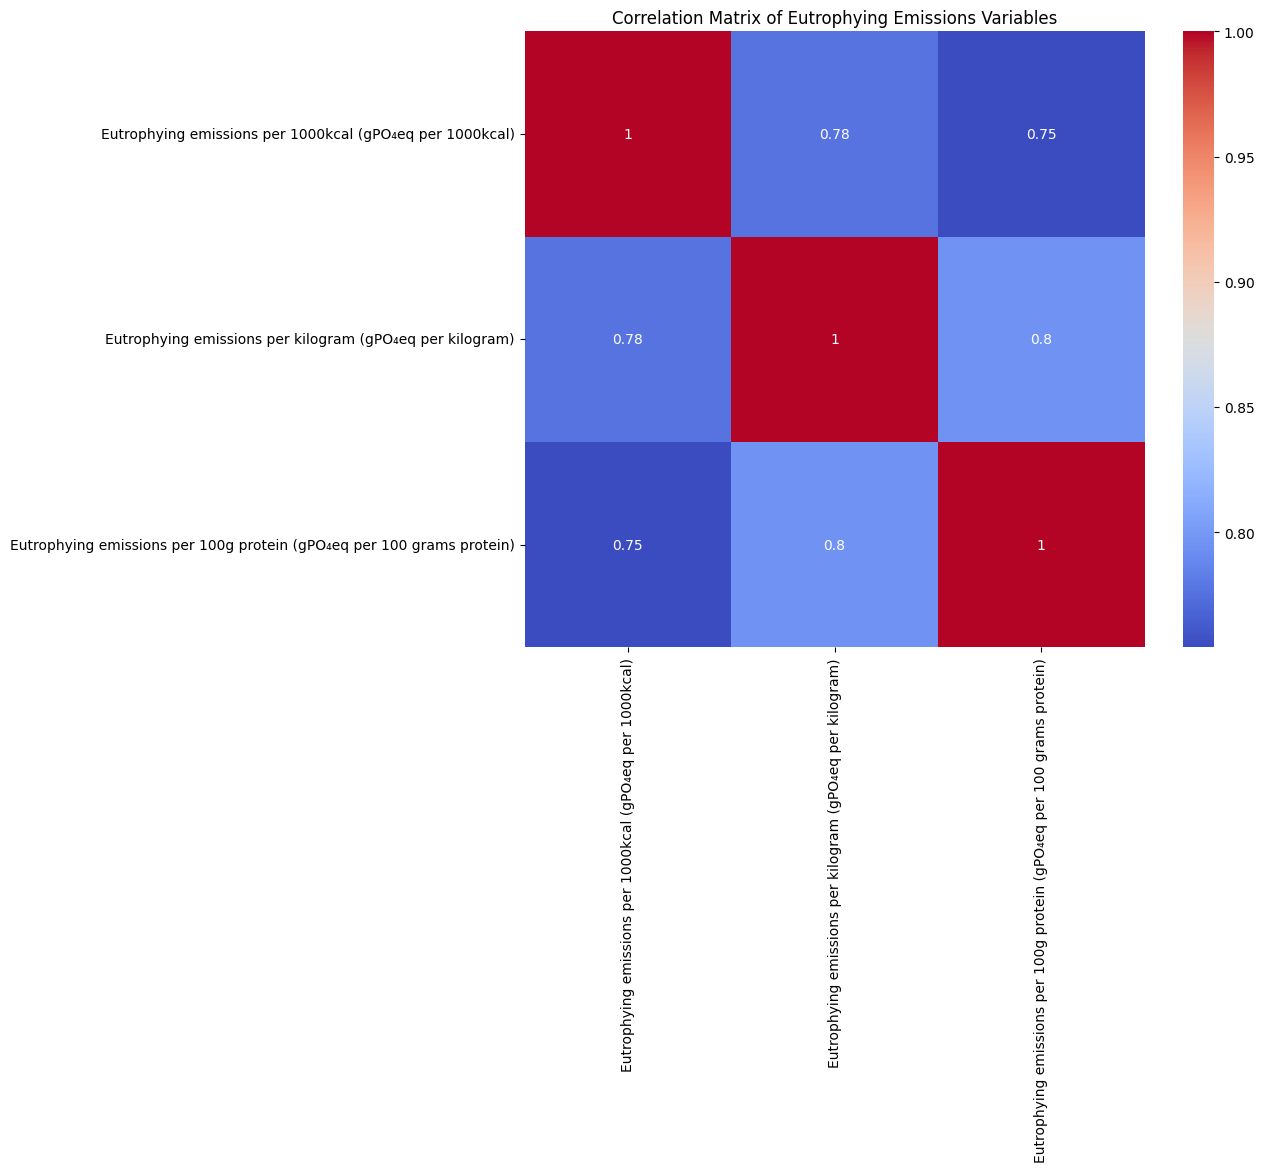

In [22]:
eutrophying_emissions_columns =['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
                                   'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)']

# Calculate correlation matrix
correlation_matrix_eutrophying = df[eutrophying_emissions_columns].corr()
# Heatmap to visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_eutrophying, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Eutrophying Emissions Variables")
plt.show()

There exist a strong correlation between the three eutrophying emission columns per products. 

- Insights:
    - This will aid in filling the null values in the those columns as I will be using a regression model to predict the null values

#### Correlation Between Freshwater Columns

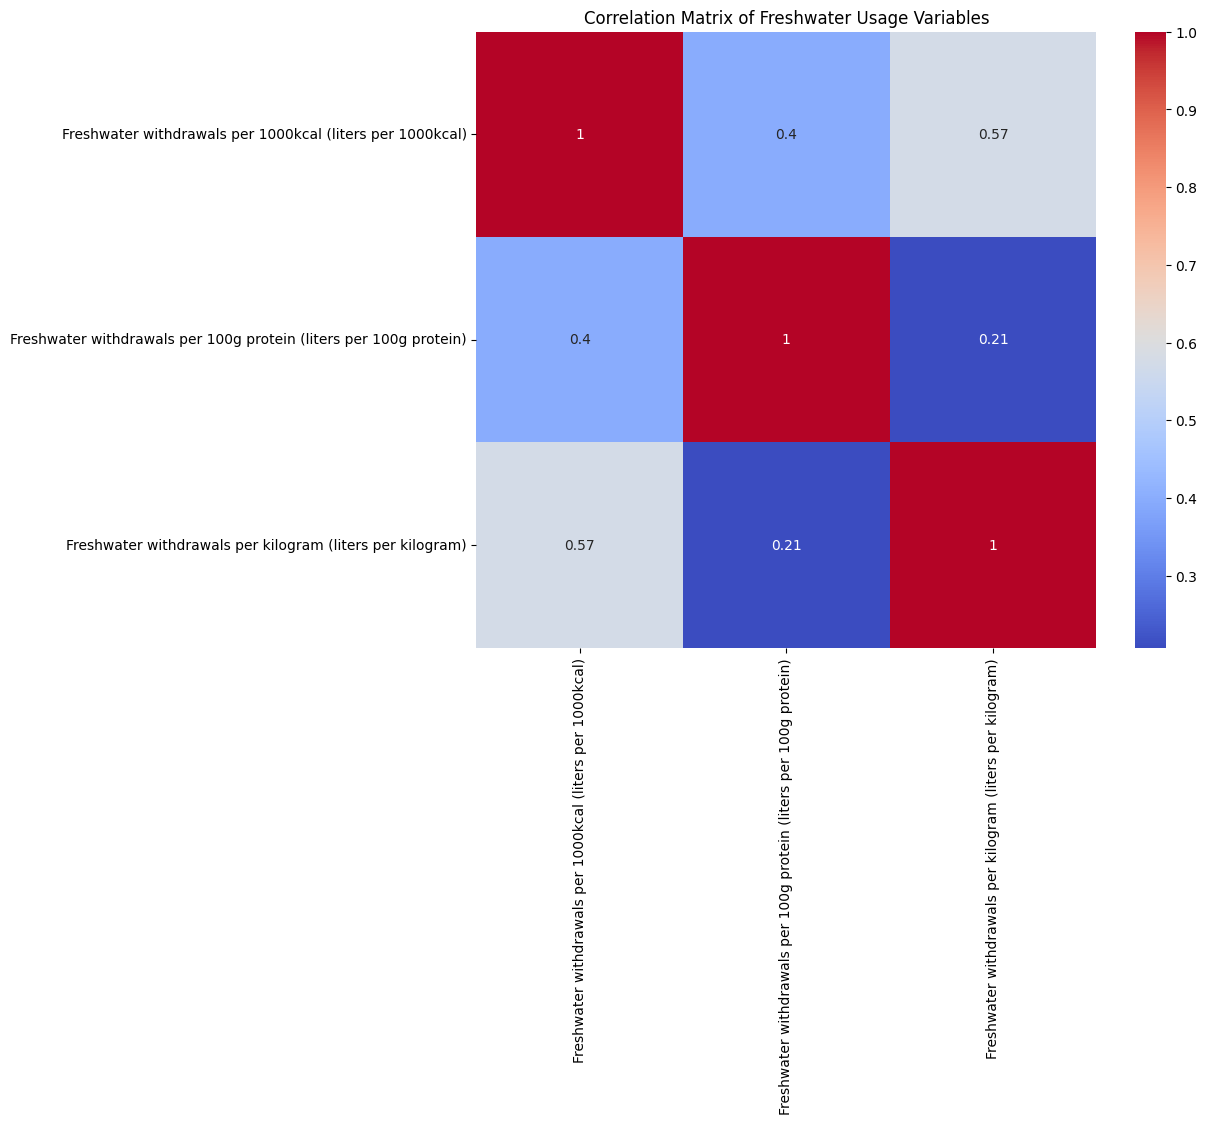

In [23]:
freshwater_usage_columns = [
    'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
    'Freshwater withdrawals per 100g protein (liters per 100g protein)',
    'Freshwater withdrawals per kilogram (liters per kilogram)',

]
# Calculate correlation matrix
correlation_matrix_freshwater = df[freshwater_usage_columns].corr()
# Heatmap to visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_freshwater, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Freshwater Usage Variables")
plt.show()



There isn't much correlation between the freshwater metrics

#### Correlation Between Between Greenhouse Gas Emissions

In [24]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

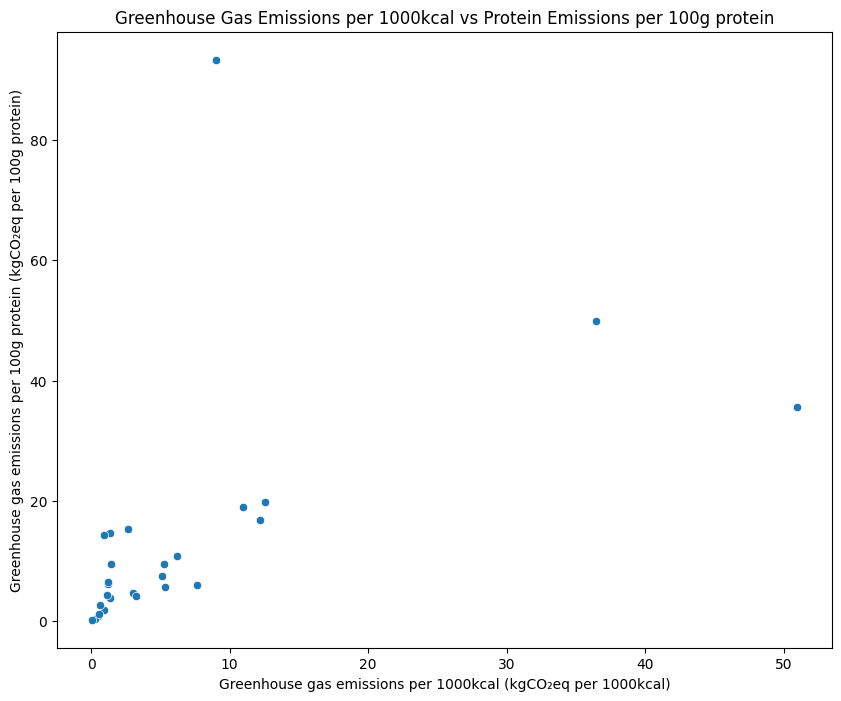

In [25]:

plt.figure(figsize=(10,8))
# plot a scatter plot
sns.scatterplot(data=df,x="Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", y="Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)")
plt.title("Greenhouse Gas Emissions per 1000kcal vs Protein Emissions per 100g protein")
plt.show()

#### In Summary:
Meat and dairy products are water-intensive: compared to plant-based foods.
Water withdrawal varies significantly: depending on the food source, production methods, and geographic location.
Understanding water usage in food production: is crucial for sustainable food systems and water resource management. 

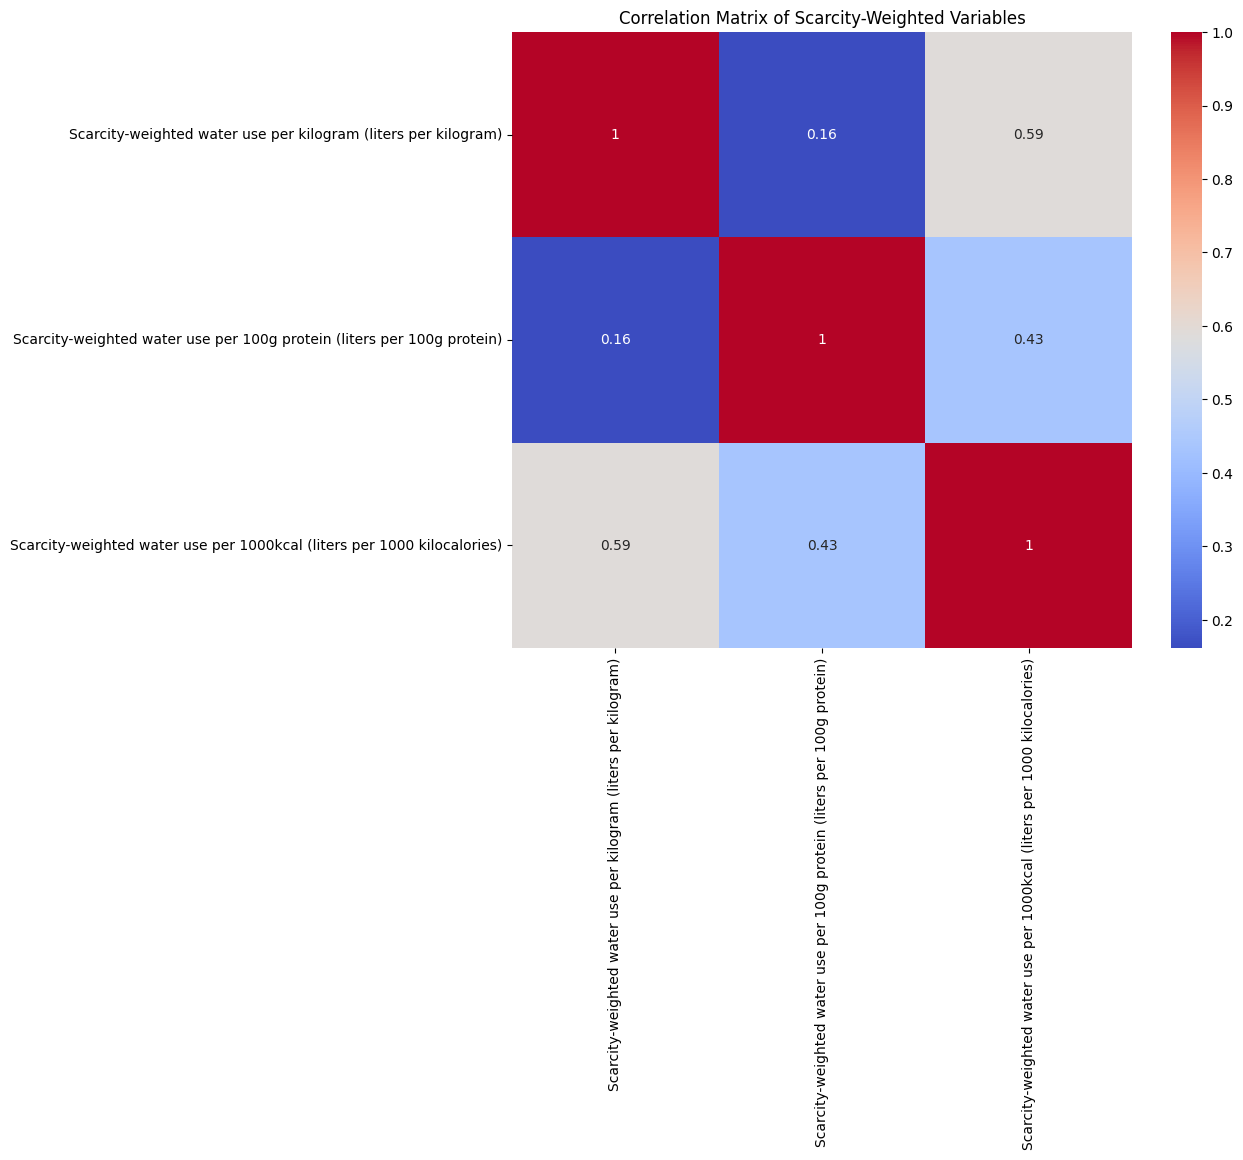

In [26]:
scarcity_weighted_water_columns = [
    'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
       'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'
]
# Calculate correlation matrix
correlation_matrix_scarcity = df[scarcity_weighted_water_columns].corr()
# Heatmap to visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_scarcity, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Scarcity-Weighted Variables")
plt.show()



#### Food Products Vs Eutrophying Emissions

In [27]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

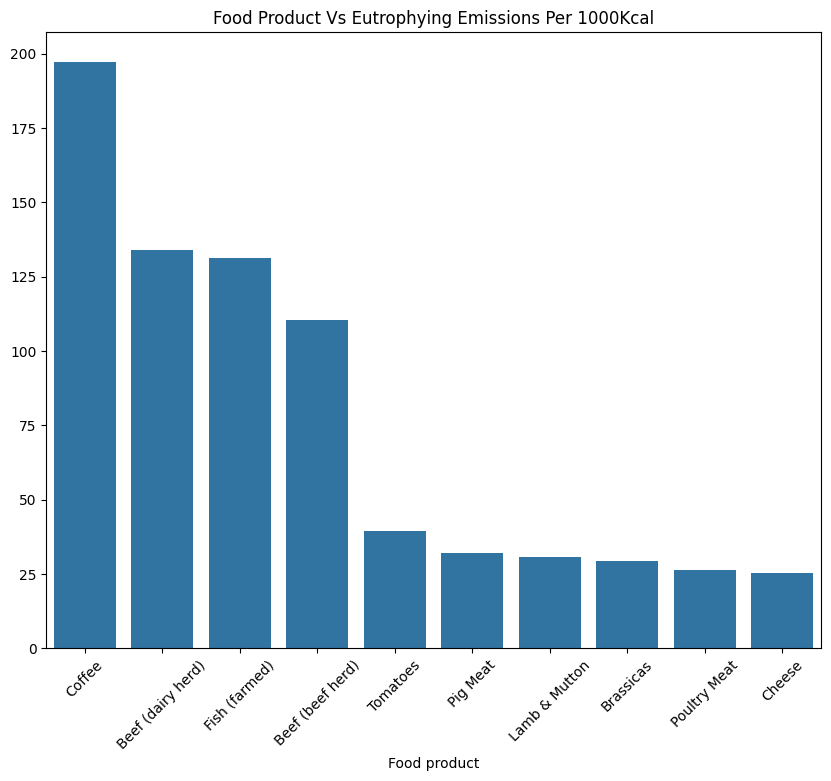

In [28]:
# Group Food Product by Eutrophying Emissions and find the eutrophyng emissions by each product
eutrophying_emissions_per_1000kcal = df.groupby("Food product")["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=eutrophying_emissions_per_1000kcal.index, y=eutrophying_emissions_per_1000kcal.values)
plt.title("Food Product Vs Eutrophying Emissions Per 1000Kcal")
plt.xticks(rotation=45)
plt.show()

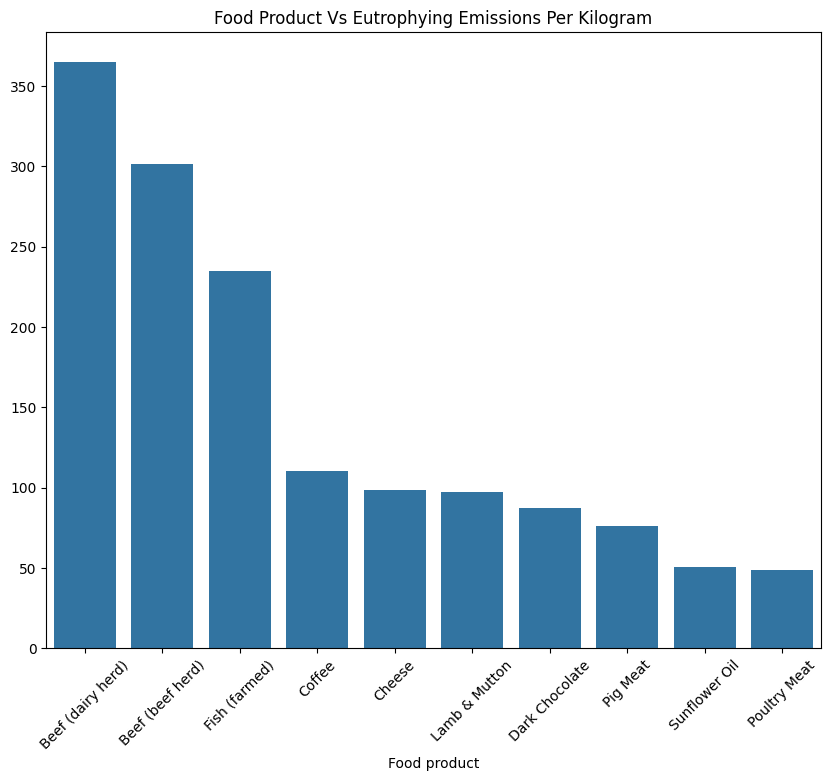

In [29]:
eutrophying_emissions_per_kg= df.groupby("Food product")["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=eutrophying_emissions_per_kg.index, y=eutrophying_emissions_per_kg.values)
plt.title("Food Product Vs Eutrophying Emissions Per Kilogram")
plt.xticks(rotation=45)
plt.show()

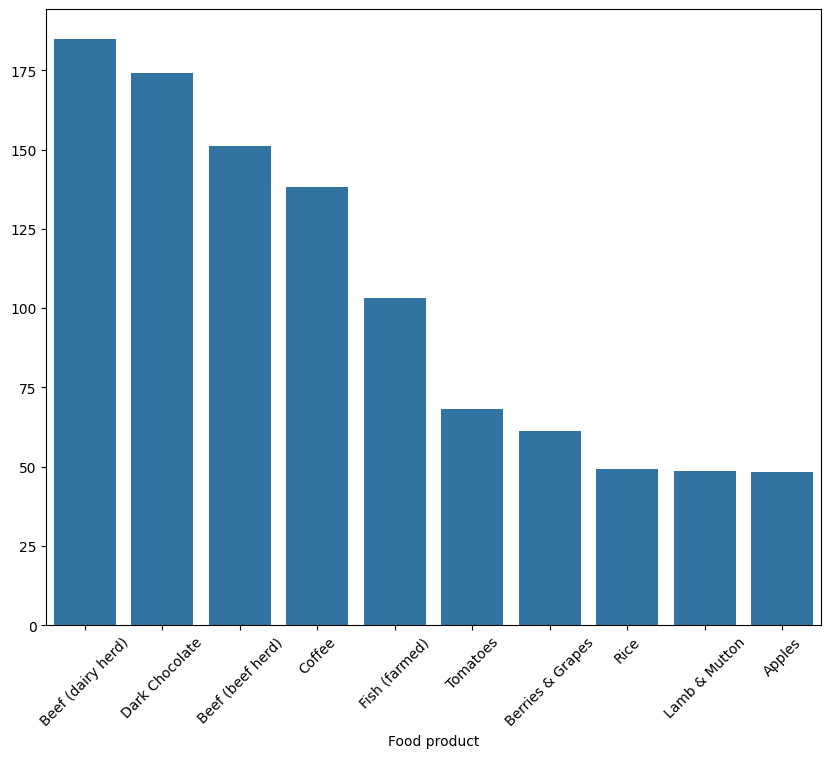

In [30]:
eutrophying_emissions_per_protein= df.groupby("Food product")["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=eutrophying_emissions_per_protein.index, y=eutrophying_emissions_per_protein.values)
plt.xticks(rotation=45)
plt.show()

# Pairwise Relationsips 

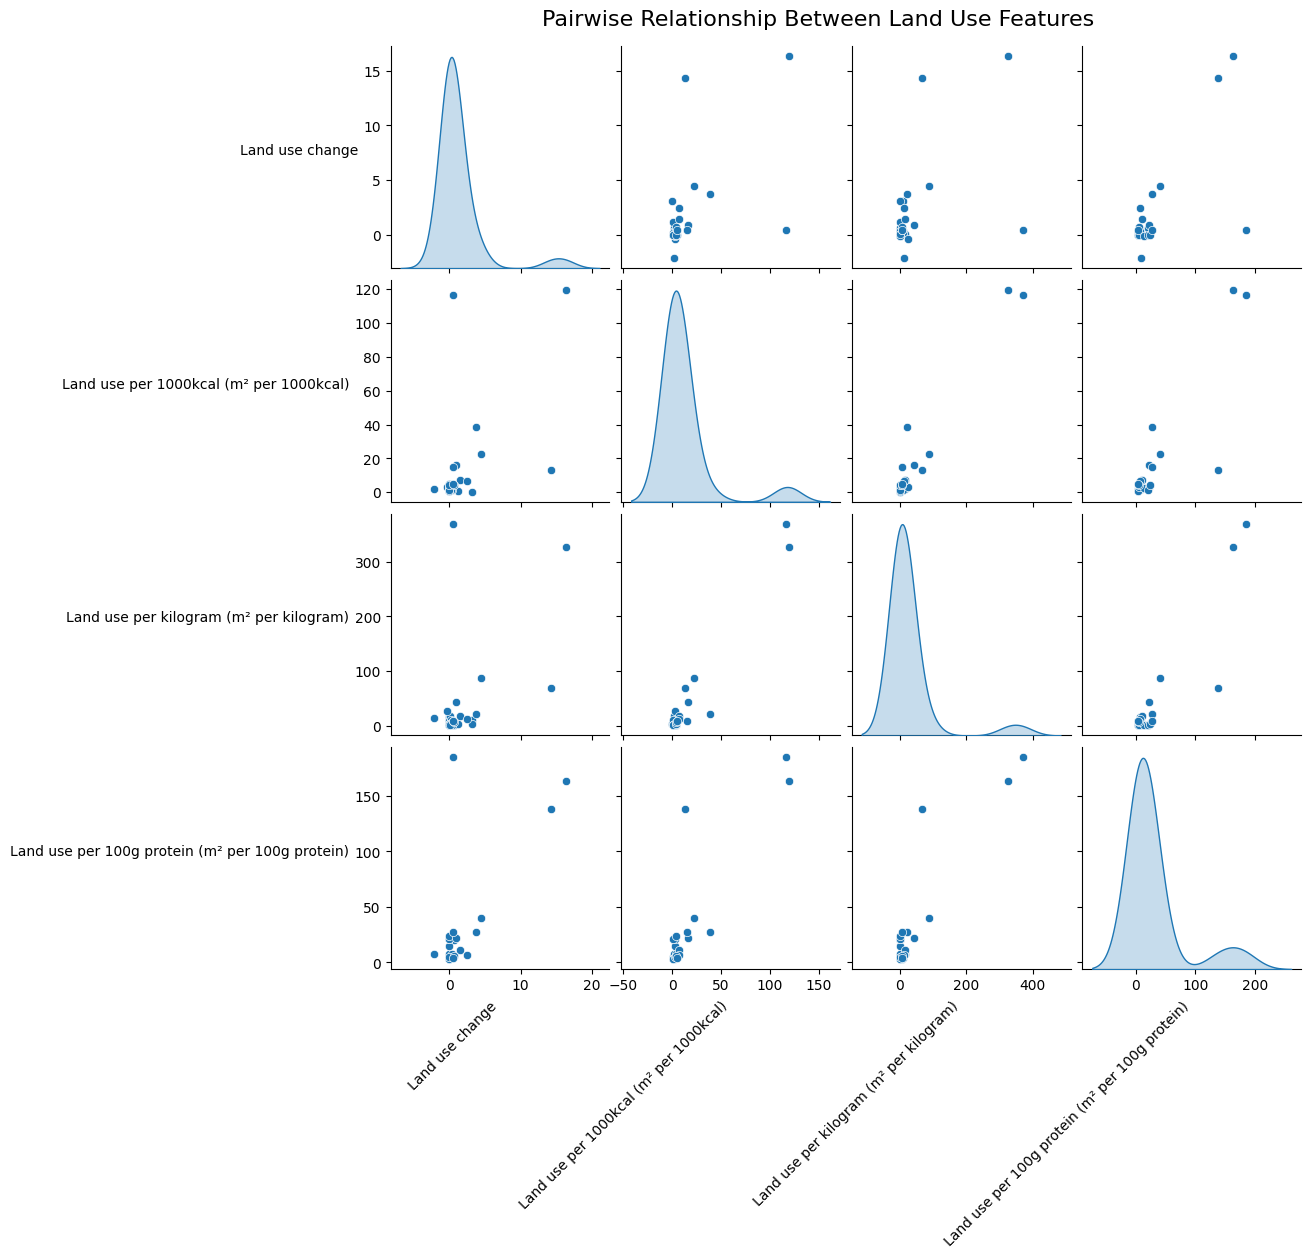

In [31]:
# Create Pairplot
pairplot = sns.pairplot(df[land_use_cols], diag_kind="kde")

# Set title 
pairplot.fig.suptitle("Pairwise Relationship Between Land Use Features", 
                      fontsize=16, y=1.02)  

# Rotate x and y labels for better readability
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, ha='right')

# Show plot
plt.show()


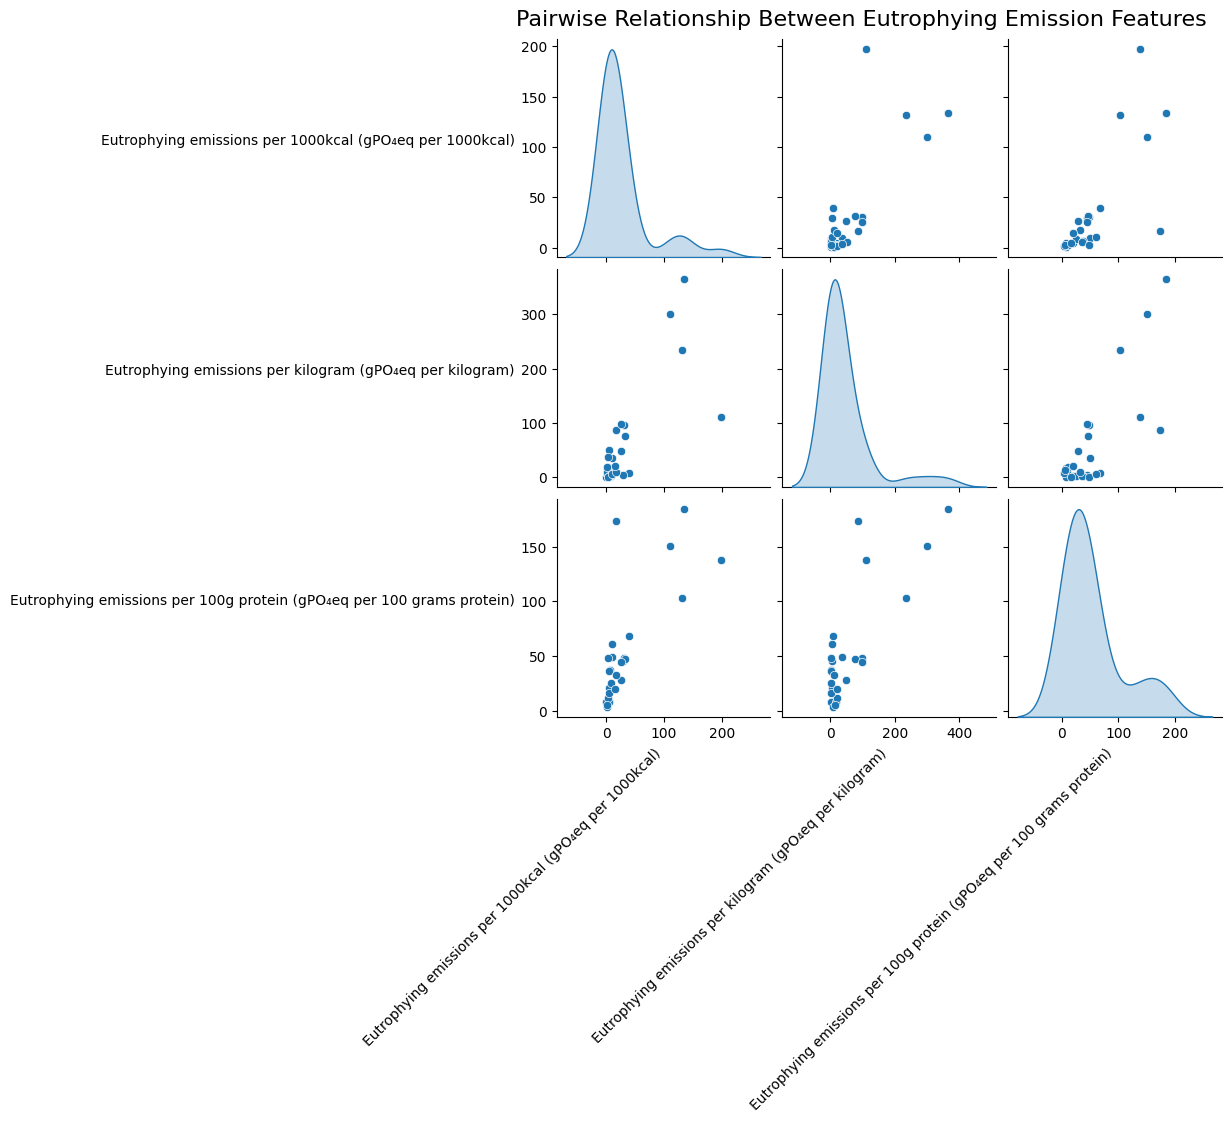

In [32]:
# Create Pairplot
pairplot = sns.pairplot(df[eutrophying_emissions_columns], diag_kind="kde")

# Set title 
pairplot.fig.suptitle("Pairwise Relationship Between Eutrophying Emission Features", 
                      fontsize=16, y=1.02)  

# Rotate x and y labels for better readability
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, ha='right')

# Show plot
plt.show()


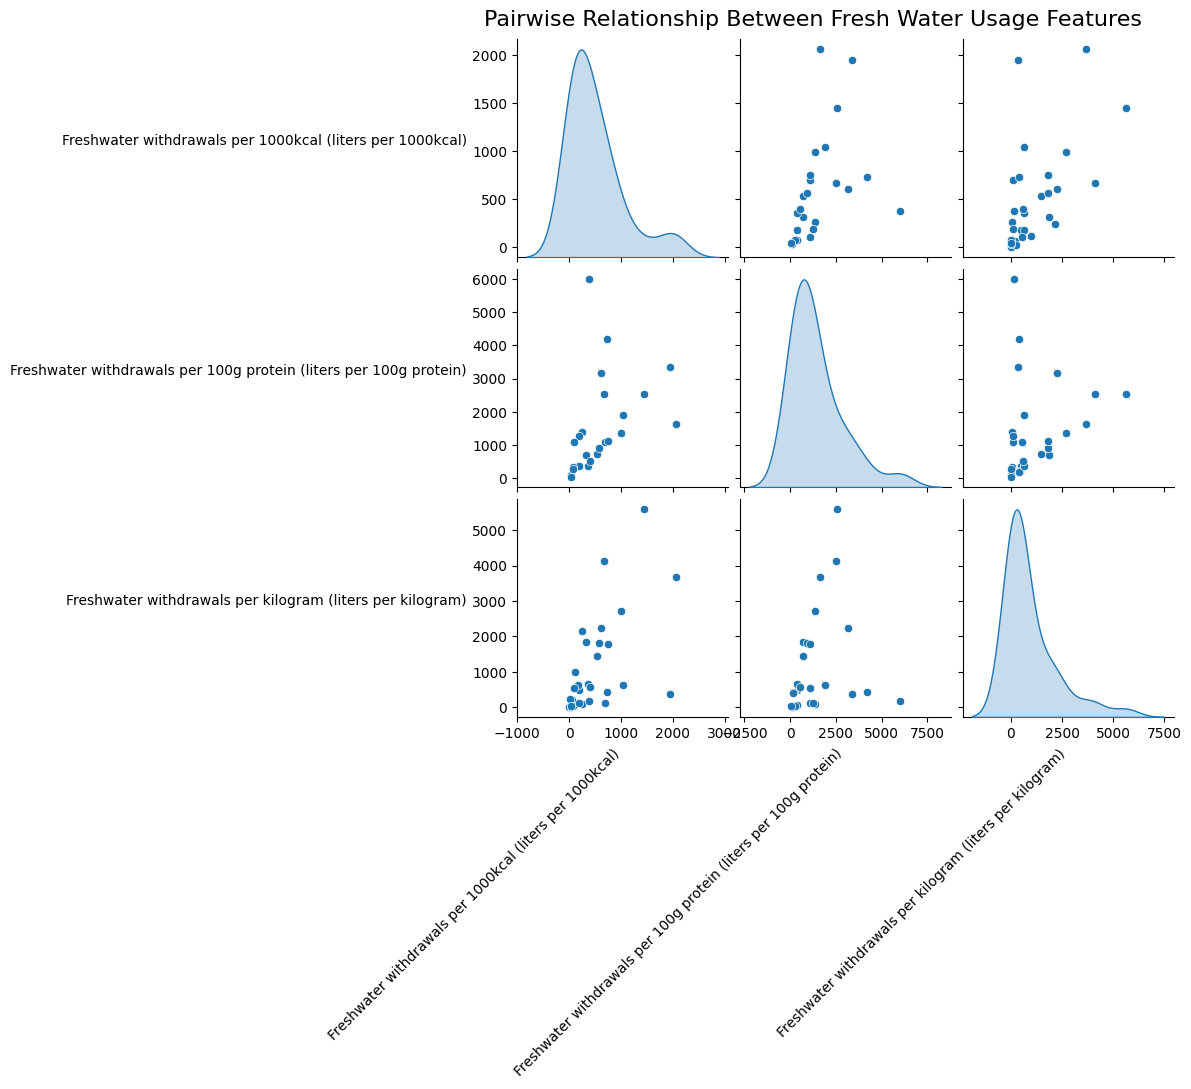

In [33]:
# Create Pairplot
pairplot = sns.pairplot(df[freshwater_usage_columns], diag_kind="kde")

# Set title 
pairplot.fig.suptitle("Pairwise Relationship Between Fresh Water Usage Features", 
                      fontsize=16, y=1.02)  

# Rotate x and y labels for better readability
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, ha='right')

# Show plot
plt.show()


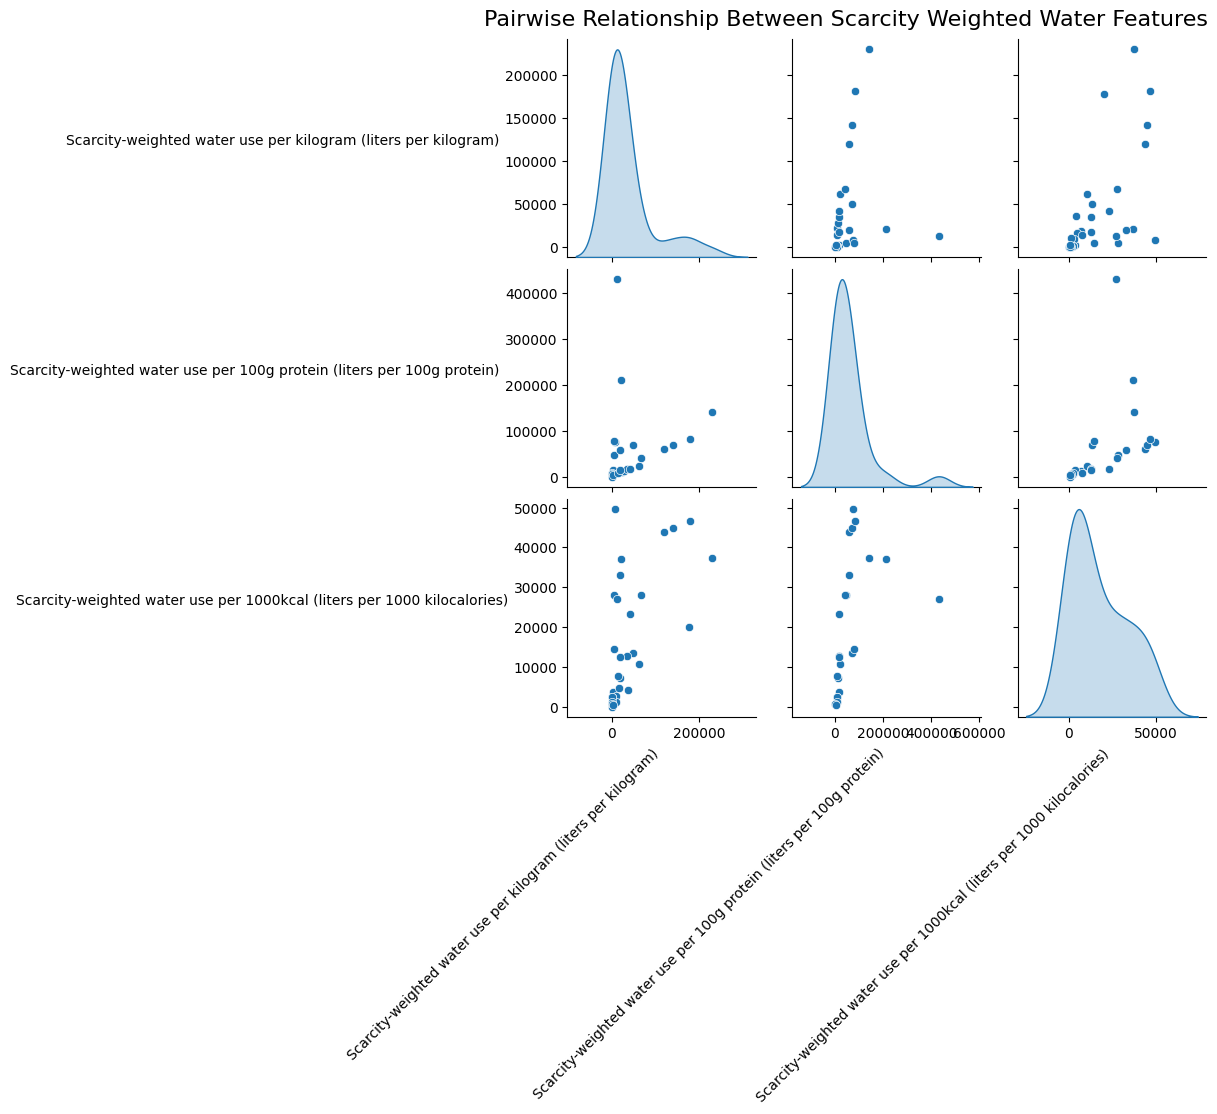

In [34]:
# Create Pairplot
pairplot = sns.pairplot(df[scarcity_weighted_water_columns], diag_kind="kde")

# Set title 
pairplot.fig.suptitle("Pairwise Relationship Between Scarcity Weighted Water Features", 
                      fontsize=16, y=1.02)  

# Rotate x and y labels for better readability
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=0, ha='right')

# Show plot
plt.show()


#### Multivariate Analysis

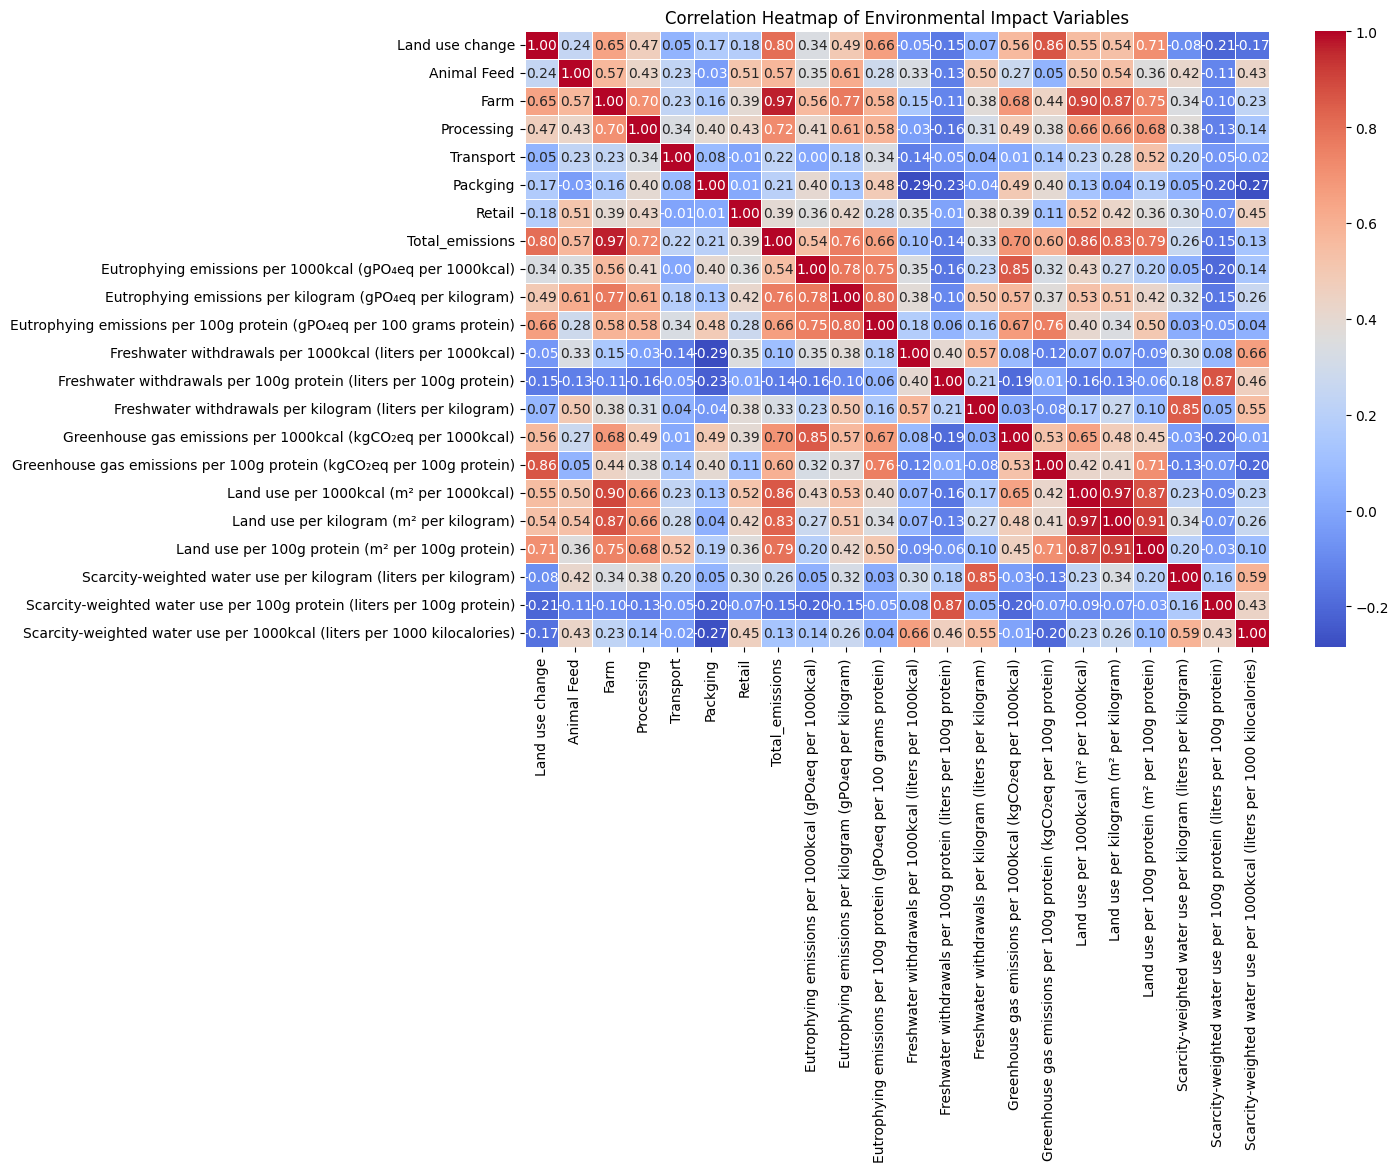

In [38]:
num_columns = df.select_dtypes(include="number").dropna(axis=0).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Environmental Impact Variables")
plt.show()


Cluster Analysis (K-Means Clustering)

#### Principal Component Analysis (PCA)

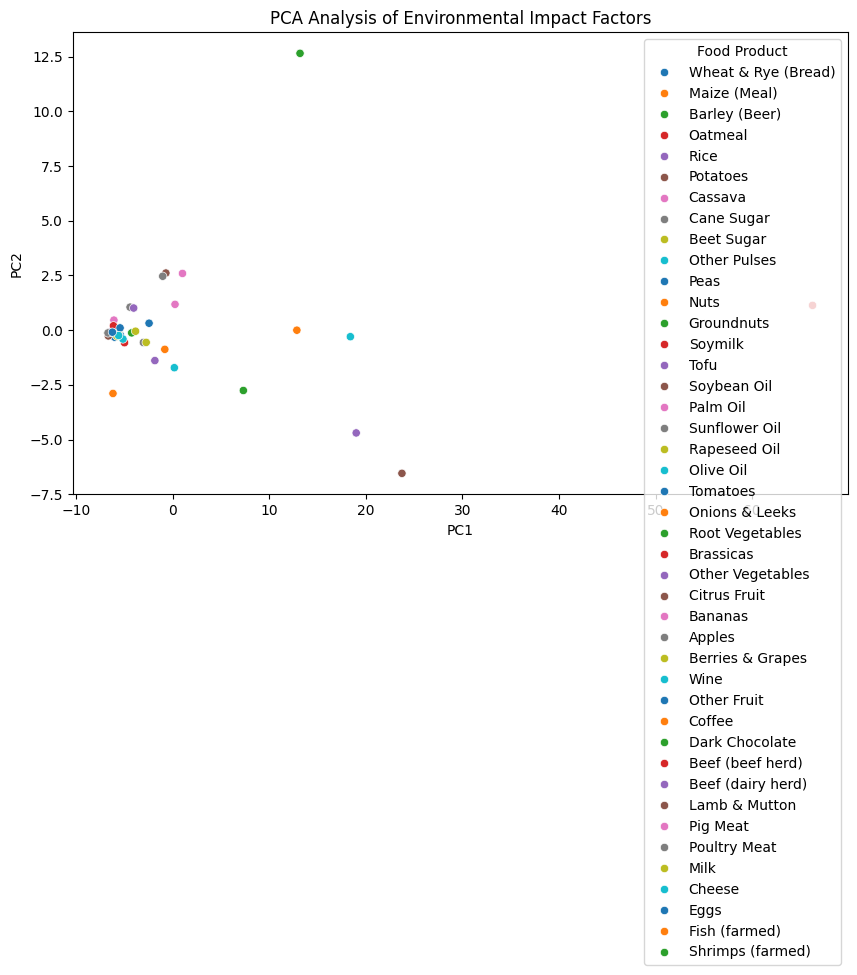

In [47]:
# Selecting numerical columns only
num_cols = df.select_dtypes(include=['number']).dropna(axis=1)  # Drop NaNs

# Perform PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_cols)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Food Product"] = df["Food product"]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="Food Product", palette="tab10")
plt.title("PCA Analysis of Environmental Impact Factors")
plt.show()

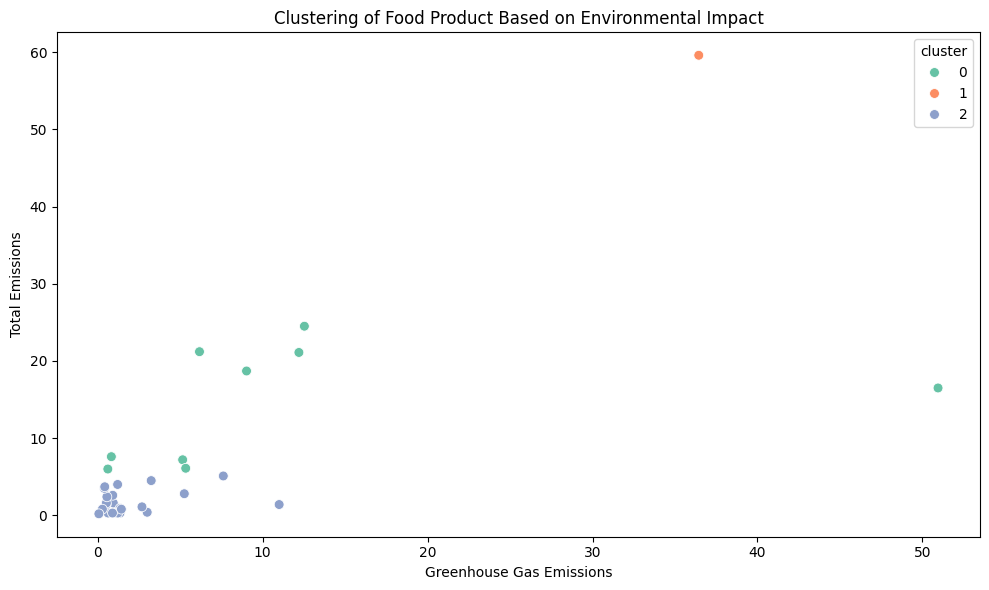

In [46]:
# Run K-Means with 3 clusters
X = df.select_dtypes(include=["number"]).dropna(axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k_means = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = k_means.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"], y=df["Total_emissions"],
                hue=df["cluster"],
                palette=sns.color_palette("Set2", 3),
                s=50)
plt.title("Clustering of Food Product Based on Environmental Impact")
plt.xlabel("Greenhouse Gas Emissions")
plt.ylabel("Total Emissions")
plt.tight_layout()
plt.show()

#### Key Observations
- The purple clusters are closely grouped, indicating that these food products have similar environmental impact characteristics. 
    - Their proximity suggests that they share common attributes in terms of emissions, land use, or water consumption.

- The green clusters are also largely grouped together, but one data point is significantly farther from the rest. 
    - This outlier suggests that while most food products in this cluster share similar environmental impact features, the isolated point may have a distinct or extreme characteristic that sets it apart.

- The orange cluster consists of a single data point, indicating that this food product has unique environmental impact attributes that do not closely resemble any other group.

#### Key Findings
- The clustering analysis reveals that certain food products produce similar levels of emissions and environmental impact, forming well-defined clusters.

- The presence of an outlier in the green cluster suggests a potential anomaly or a food product with an unusual environmental footprint.

- The single-member orange cluster may indicate a food product with extreme or highly distinctive environmental characteristics.  

#### Multiple Linear Regression

In [57]:
# Define dependent and independent variables
X = df.drop(columns=["Food product","Total_emissions"])
# Fill Null Values with median
X = X.fillna(X.median())
y = df['Total_emissions']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

# Print summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Total_emissions   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.678e+21
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.52e-11
Time:                        19:47:50   Log-Likelihood:                 533.24
No. Observations:                  24   AIC:                            -1020.
Df Residuals:                       1   BIC:                            -993.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- **Key Observations:**:
  - The multiple linear regression model explains 100% of the variation in total emissions.
  
  - Land use change, Animal Feed, Farm, Processing, Transport, Packaging, and Retail all have a coefficient of 1.0000 and a p-value of 0.000.

  - This means they perfectly predict Total_emissions, due to the fact that total_emissions is simply the sum of these variables.

  - Other environmental impact variables (e.g., greenhouse gas emissions, freshwater withdrawals) have very small coefficients and large p-values (> 0.05). This means they do not significantly affect Total C02 emissions.



#### Data Preprocessing

#### Dashboarding

#### Conclusion